In [1]:
from sklearn.datasets import load_iris
import pandas as pd

In [2]:
iris=load_iris()

In [3]:
iris_df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [4]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
iris_df['Target']=iris.target

In [6]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [8]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [9]:
x_train[0].shape

(28, 28)

In [10]:
len(x_train),len(y_train),len(x_test),len(y_test)

(60000, 60000, 10000, 10000)

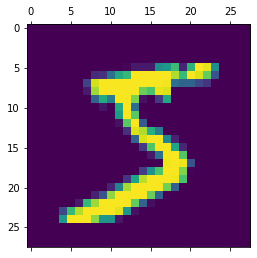

In [11]:
plt.matshow(x_train[0])

In [12]:
#reshaping the array
#from 2 dimensional to 1-d array
x_train.shape

(60000, 28, 28)

In [13]:
x_train=x_train/255
x_test=x_test/255

In [14]:
x_train_reshape=x_train.reshape(len(x_train),28*28)
x_train_reshape.shape

(60000, 784)

In [15]:
x_test_reshape=x_test.reshape(len(x_test),28*28)
x_test_reshape.shape

(10000, 784)

In [16]:
model= keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train_reshape,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4662 - accuracy: 0.8777
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3036 - accuracy: 0.9155
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2836 - accuracy: 0.9203
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2731 - accuracy: 0.9241
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2665 - accuracy: 0.9256


In [17]:
model.evaluate(x_test_reshape,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2658 - accuracy: 0.9270


[0.2658229172229767, 0.9269999861717224]

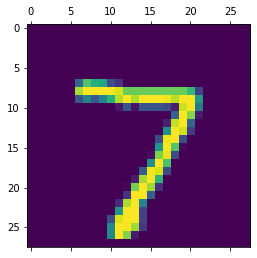

In [18]:
plt.matshow(x_test[0])

In [19]:
y_predict=model.predict(x_test_reshape)
y_predict[0]

array([2.06282139e-02, 3.73424314e-07, 7.40932226e-02, 9.57808852e-01,
       3.16640735e-03, 1.20652705e-01, 2.00582463e-06, 9.99789476e-01,
       1.01363361e-01, 6.38861001e-01], dtype=float32)

In [20]:
np.argmax(y_predict[0])

7

In [21]:
y_predict_labels=[np.argmax(i) for i in y_predict]
y_predict_labels[:5]

[7, 2, 1, 0, 4]

In [22]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predict_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    0,    2,    0,    5,    8,    2,    1,    1],
       [   0, 1114,    2,    2,    0,    2,    4,    2,    9,    0],
       [   5,    8,  924,   18,    8,    4,   14,   10,   36,    5],
       [   3,    0,   19,  918,    1,   26,    3,    9,   19,   12],
       [   1,    2,    2,    1,  919,    0,   12,    3,    8,   34],
       [   9,    2,    2,   30,   10,  780,   18,    4,   29,    8],
       [   7,    3,    4,    1,    7,   10,  922,    2,    2,    0],
       [   1,    5,   22,    7,   10,    1,    0,  944,    3,   35],
       [   7,    7,    7,   19,    9,   32,    9,   11,  867,    6],
       [  11,    7,    1,    8,   31,    6,    0,   19,    5,  921]])>

Text(69.0, 0.5, 'Actual')

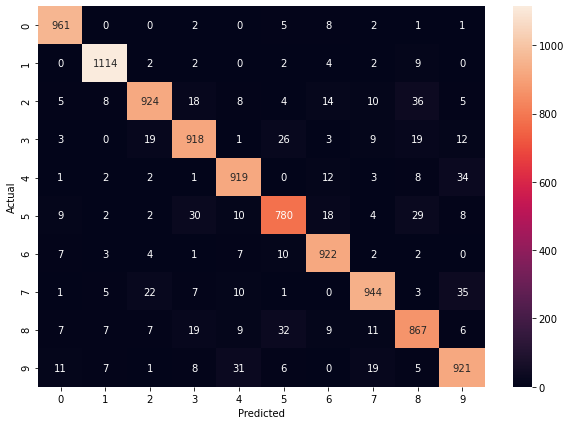

In [23]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [24]:
#creating hidden layers
model= keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train_reshape,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2713 - accuracy: 0.9242
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1215 - accuracy: 0.9643
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0850 - accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0649 - accuracy: 0.9804
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0501 - accuracy: 0.9844


In [25]:
model.evaluate(x_test_reshape,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0819 - accuracy: 0.9758


[0.08191874623298645, 0.9757999777793884]

In [26]:
y_predict=model.predict(x_test_reshape)
y_predict_labels=[np.argmax(i) for i in y_predict]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predict_labels)

Text(69.0, 0.5, 'Actual')

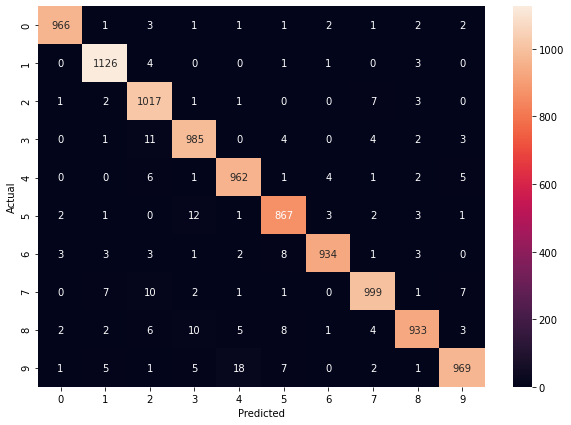

In [27]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')